# Exploratory Data Analysis of Titanic Problem

## In this section we'll be doing th following things:
#### 1. Data Extraction
#### 2.Cleaning:
#### 3.Plotting:
#### 4.Assumptions:

## Import Important libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,model_selection
import xgboost as xgb
color=sns.color_palette()
%matplotlib inline

## Load the datasets

In [14]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print train.shape
print test.shape

(891, 12)
(418, 11)


### Lets have a look at the dataset

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived is the target variable.Other variables associated with datasets are:
1.PassengerId:The id of Each passenger
2.Pclass:Passenger Class
3.Name:Name of each Passenger
4.Sex:Sex of each passenger
5.Age:Age of each passenger
6.SibSp:sibling and spouse travelling with each passenger
7.Parch:Parents and children travelling with each passenger
8.Ticket:Ticket number of each passenger
Fare:Ticket Fare
Cabin:the cabin number
Embarked:The place of boarding the ship

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


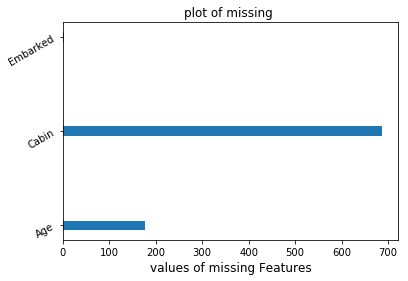

In [17]:
miss=train.isnull().sum().reset_index()
miss.columns=['Features','Missing']
miss=miss.loc[miss['Missing']>0]

count=np.arange(miss.shape[0])
width=0.1
fig,ax=plt.subplots(figsize=(6,4))
plt.barh(count,miss.Missing.values,width)
ax.set_yticks(count)
ax.set_yticklabels(miss.Features.values,rotation=30)
ax.set_xlabel('values of missing Features',fontsize=12)
plt.title('plot of missing ')
plt.show()


Lets fill Age with median of Age and then visualize the data

In [18]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Lets visualize the data

### Lets visualize the survival based on Gender

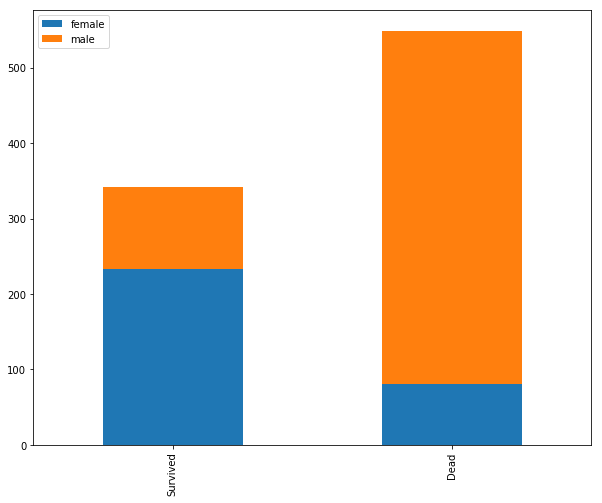

In [20]:
survived=train[train['Survived']==1]['Sex'].value_counts()
dead=train[train['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',stacked=True,figsize=(10,8))

It seems like women got more chance of survival.

### Now visualize the survival based on Age.

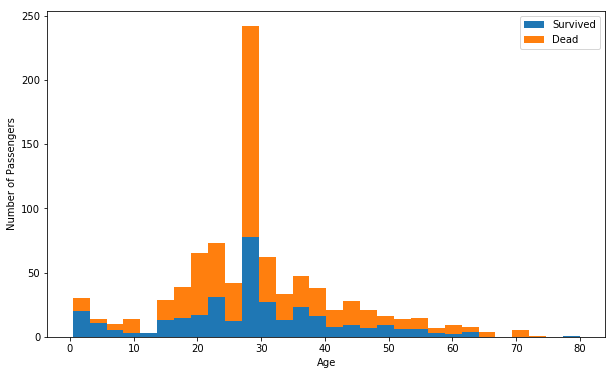

In [21]:
fig=plt.figure(figsize=(10,6))
plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],stacked='True',bins=30,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

### Now visualize the survival based on Fare

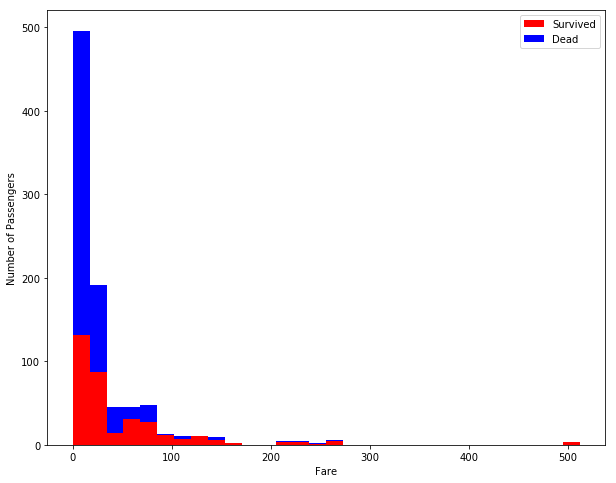

In [22]:
fig=plt.figure(figsize=(10,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],stacked=True,color=['r','b'],
        bins=30,label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

Seems like passengers with high ticket fare are more likely to be rescued.

### Now visualize survival based on Passenger class

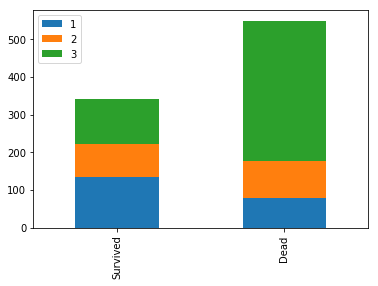

In [23]:
survived=train[train['Survived']==1]['Pclass'].value_counts()
dead=train[train['Survived']==0]['Pclass'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',stacked=True)

As we can see class 3 people are more likely to die.

### Survival w.r.t Parch

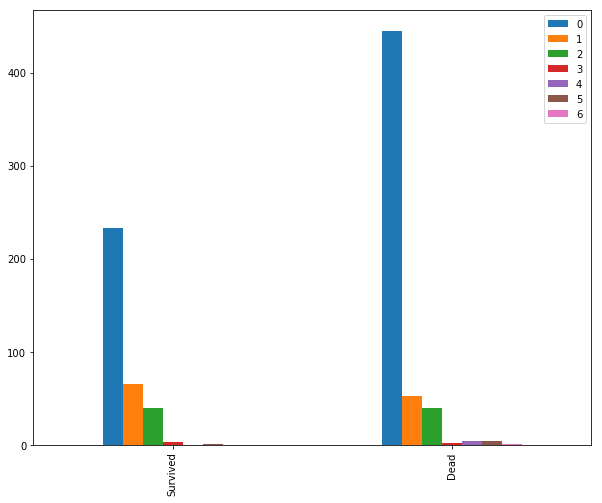

In [24]:
survived=train[train['Survived']==1]['Parch'].value_counts()
dead=train[train['Survived']==0]['Parch'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=(10,8))

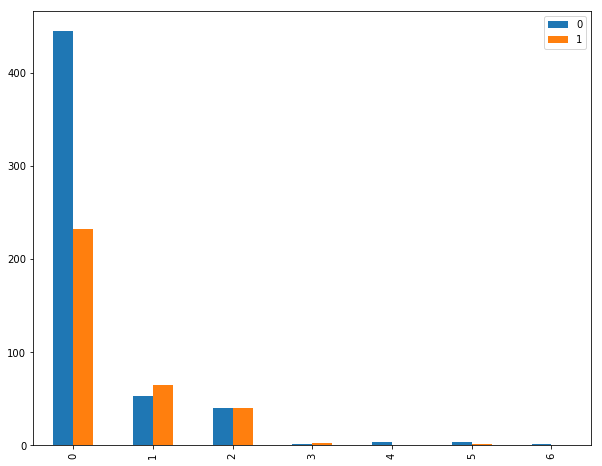

In [25]:
survived1=train[train['Parch']==0]['Survived'].value_counts()
survived2=train[train['Parch']==1]['Survived'].value_counts()
survived3=train[train['Parch']==2]['Survived'].value_counts()
survived4=train[train['Parch']==3]['Survived'].value_counts()
survived5=train[train['Parch']==4]['Survived'].value_counts()
survived6=train[train['Parch']==5]['Survived'].value_counts()
survived7=train[train['Parch']==6]['Survived'].value_counts()

df=pd.DataFrame([survived1,survived2,survived3,survived4,survived5,survived6,survived7])
df.index=['0','1','2','3','4','5','6']
df.plot(kind='bar',legend=['Dead','Survived'],figsize=(10,8))
plt.legend()

### Survival w.r.t Sibsp

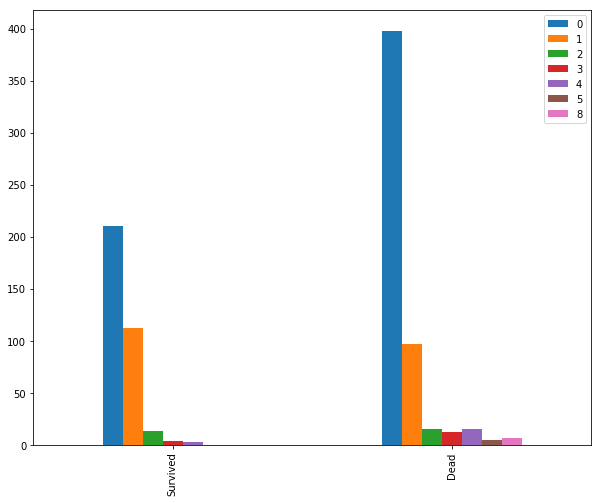

In [26]:
survived=train[train['Survived']==1]['SibSp'].value_counts()
dead=train[train['Survived']==0]['SibSp'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=(10,8))

### Lets See the impact of Embarkation on Survival

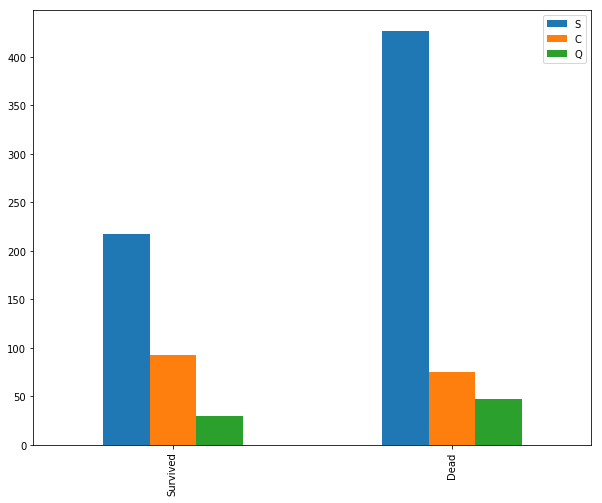

In [27]:
survived=train[train['Survived']==1]['Embarked'].value_counts()
dead=train[train['Survived']==0]['Embarked'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=(10,8))

## Now Lets see the important Features

In [28]:
#Step 1 is to convert the categorical variables
for f in train.columns:
    if train[f].dtype=='object':
        lbl=preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f]=lbl.transform(list(train[f].values))

In [29]:
#Step 2: Separate the target variable from train
train_y=train.Survived.values
train_x=train.drop(['PassengerId','Survived'],axis=1)

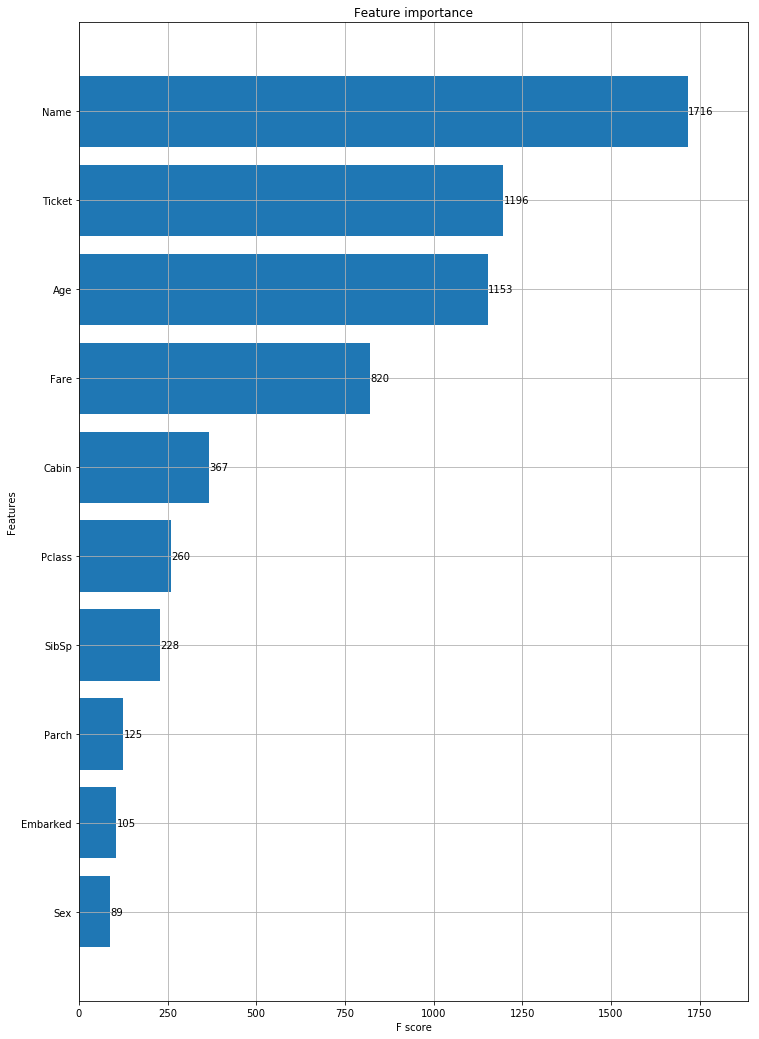

In [30]:
#Step 3 Prepare the xgboost params,dtrain and model
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain=xgb.DMatrix(train_x,train_y,feature_names=train_x.columns.values)
model=xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)
fig,ax=plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=50,height=0.8,ax=ax)
plt.show()

## Feature Engineering

### Step 1: Combine the data

In [2]:
def combined_data():
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    
    target=train.Survived
    train.drop('Survived',axis=1,inplace=True)
    
    combined=train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [3]:
combined=combined_data()

In [4]:
combined.shape

(1309, 11)

In [5]:
def get_titles():
    global combined
    
    combined['Title']=combined['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
    
    dictionary={
                        "Capt":       "Other",
                        "Col":        "Other",
                        "Major":      "Other",
                        "Jonkheer":   "Other",
                        "Don":        "Other",
                        "Sir" :       "Other",
                        "Dr":         "Other",
                        "Rev":        "Other",
                        "the Countess":"Other",
                        "Dona":       "Other",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Other"
    }
    combined['Title']=combined.Title.map(dictionary)

In [6]:
get_titles()

In [7]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [8]:
grouped_train=combined.iloc[0:891].groupby(['Sex','Pclass','Title'])
train_median=grouped_train.median()

grouped_test=combined.iloc[891:].groupby(['Sex','Pclass','Title'])
test_median=grouped_test.median()


In [9]:
train_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                             
female 1      Miss          369.0  30.0    0.0    0.0   88.25000
              Mrs           499.0  40.0    1.0    0.0   79.20000
              Other         760.0  48.0    0.0    0.0   39.60000
       2      Miss          437.5  24.0    0.0    0.0   13.00000
              Mrs           439.5  31.5    1.0    0.0   26.00000
       3      Miss          372.0  18.0    0.0    0.0    8.75625
              Mrs           405.5  31.0    1.0    1.0   15.97500
male   1      Master        446.0   4.0    1.0    2.0  120.00000
              Mr            463.0  40.0    0.0    0.0   42.40000
              Other         640.5  49.0    0.0    0.0   33.00000
       2      Master        408.0   1.0    1.0    1.0   26.00000
              Mr            440.0  31.0    0.0    0.0   13.00000
              Other         358.5  46.5    0.0    0.0   13.00000
       3      Master        270.5   4.0    3.5    1.0   28.51250
              Mr            472.0  26.0    0.0    0.0    7.89580

In [10]:
test_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                             
female 1      Miss         1074.0  32.0    0.0    0.0  158.20835
              Mrs          1076.0  48.0    1.0    0.0   63.35830
              Other        1306.0  39.0    0.0    0.0  108.90000
       2      Miss         1121.0  19.5    1.0    1.0   24.50000
              Mrs          1123.5  29.0    0.0    0.0   26.00000
       3      Miss         1090.5  22.0    0.0    0.0    7.87920
              Mrs          1048.0  28.0    1.0    0.5   14.28125
male   1      Master       1022.0   9.5    1.0    2.0  198.43750
              Mr           1102.0  42.0    0.0    0.0   50.24790
              Other        1094.0  53.0    1.0    0.0   81.85830
       2      Master       1033.5   5.0    0.5    1.5   27.75000
              Mr           1156.0  28.0    0.0    0.0   13.00000
              Other        1048.5  35.5    0.5    0.5   19.50000
       3      Master       1173.0   7.0    1.0    1.0   15.24580
              Mr           1101.0  25.0    0.0    0.0    7.85420

In [11]:
def process_age():
    global combined
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Other':
                return grouped_median.loc['female', 1, 'Other']['Age']
           

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Other':
                return grouped_median.loc['male', 1, 'Other']['Age']
          
        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Other':
                return grouped_median.loc['male', 2, 'Other']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
            
    
    combined.head(891).Age=combined.head(891).apply(lambda x:fillAges(x,train_median) if np.isnan else r['Age'],axis=1)
    combined.iloc[891:].Age=combined.iloc[891:].apply(lambda x:fillAges(x,test_median) if np.isnan else r['Age'],axis=1)

In [12]:
process_age()

/home/abhi/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [14]:
def process_names():
    global combined
    combined.drop('Name',axis=1,inplace=True)
    
    title_dum=pd.get_dummies(combined['Title'],prefix='Title')
    combined=pd.concat([combined,title_dum],axis=1)
    
    combined.drop('Title',axis=1,inplace=True)

In [15]:
process_names()

In [16]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,3,male,26.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,2,1,female,40.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0
2,3,3,female,18.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0
3,4,1,female,40.0,1,0,113803,53.1000,C123,S,0,0,0,1,0
4,5,3,male,26.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0


## Processing the Fare

In [17]:
def process_Fare():
    global combined
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(),inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891].Fare.mean(),inplace=True)

In [18]:
process_Fare()

/home/abhi/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           295 non-null object
Embarked        1307 non-null object
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Other     1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 108.7+ KB


## Lets process the Embarked

In [20]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S',inplace=True)
    
    #dummy Encoding
    dummy=pd.get_dummies(combined['Embarked'],prefix='Embarked')
    
    combined=pd.concat([combined,dummy],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)

In [21]:
process_embarked()

In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           295 non-null object
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Other     1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(8)
memory usage: 102.3+ KB


## Processing Cabin

In [23]:
def process_cabin():
    global combined
    #replace the missing cabins
    combined['Cabin'].fillna('U',inplace=True)
    
    #Mapping each cabin value with cabin letter
    combined['Cabin']=combined['Cabin'].map(lambda x:x[0])
    
    #dummy Encoding
    dummy=pd.get_dummies(combined['Cabin'],prefix='Cabin')
    combined=pd.concat([combined,dummy],axis=1)
    combined.drop('Cabin',axis=1,inplace=True)
    

In [24]:
process_cabin()

In [25]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Other     1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Cabin_A         1309 non-null uint8
Cabin_B         1309 non-null uint8
Cabin_C         1309 non-null uint8
Cabin_D         1309 non-null uint8
Cabin_E         1309 non-null uint8
Cabin_F         1309 non-null uint8
Cabin_G         1309 non-null uint8
Cabin_T         1309 non-null uint8
Cabin_U         1309 no

## Processing Pclass

In [26]:
def process_Pclass():
    global combined
    
    dummy=pd.get_dummies(combined['Pclass'],prefix='Pclass')
    combined=pd.concat([combined,dummy],axis=1)
    
    combined.drop('Pclass',axis=1,inplace=True)
    

In [27]:
process_Pclass()

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
PassengerId     1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Other     1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Cabin_A         1309 non-null uint8
Cabin_B         1309 non-null uint8
Cabin_C         1309 non-null uint8
Cabin_D         1309 non-null uint8
Cabin_E         1309 non-null uint8
Cabin_F         1309 non-null uint8
Cabin_G         1309 non-null uint8
Cabin_T         1309 non-null uint8
Cabin_U         1309 non-null uint8
Pclass_1        1309 no

## Processing Ticket

In [29]:
def process_ticket():
    global combined
    
    def clean_Ticket(ticket):
        ticket=ticket.replace('.','')
        ticket=ticket.replace('/','')
        ticket=ticket.split()
        ticket=map(lambda t:t.strip(),ticket)
        ticket=filter(lambda t: not t.isdigit(),ticket)
        if len(ticket)>0:
            return ticket[0]
        else:
            return 'XX'
        
     
    combined['Ticket']=combined['Ticket'].map(clean_Ticket)
    
    # Get Dummies
    dummy=pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined=pd.concat([combined,dummy],axis=1)
    
    combined.drop('Ticket',axis=1,inplace=True)

In [30]:
process_ticket()

In [31]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 63 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null object
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Other       1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_T           1309 non-null uint8
Cabin_U           1309 non-null uint8
Pclass_1      

## Processing Family

In [32]:
def processing_family():
    global combined
    
    combined['FamilySize']=combined['Parch']+combined['SibSp']+1
    
    combined['S_Family']=combined['FamilySize'].map(lambda x:1 if x==1 else  0)
    combined['M_Family']=combined['FamilySize'].map(lambda x:1 if 2<=x<=4 else 0)
    combined['L_Family']=combined['FamilySize'].map(lambda x:1 if x>4 else 0)
    

In [33]:
processing_family()

In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 67 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null object
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Other       1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_T           1309 non-null uint8
Cabin_U           1309 non-null uint8
Pclass_1      

In [35]:
def process_s():
    global combined
    combined['Sex']=combined['Sex'].map({'male':1,'female':0})

In [36]:
process_s()

In [37]:
combined.shape

(1309, 67)

In [38]:
combined.drop('PassengerId',axis=1,inplace=True)

## Modelling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [40]:
train_1=pd.read_csv('train.csv')
target=train_1.Survived

In [41]:
train=combined.iloc[0:891]
test=combined.iloc[891:]

In [42]:
print train.shape
print test.shape


(891, 66)
(418, 66)


In [43]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

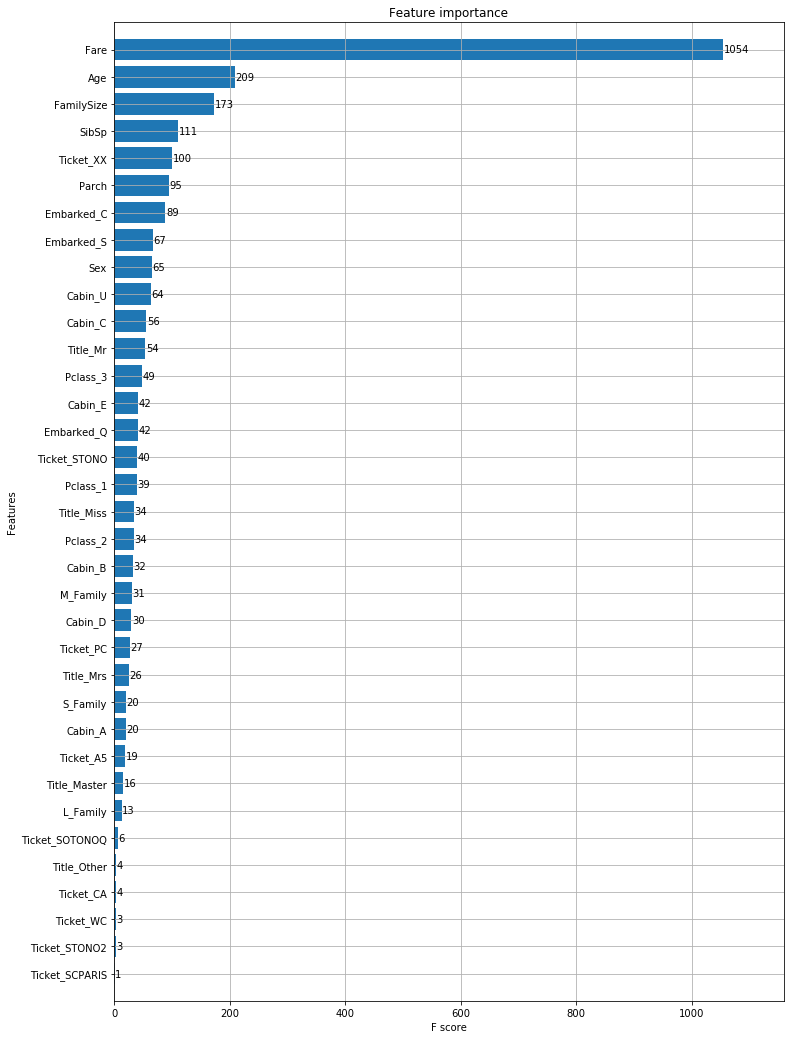

In [44]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': 1
}
dtrain=xgb.DMatrix(train,target,feature_names=train.columns.values)
model=xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)
fig,ax=plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=50,height=0.8,ax=ax)
plt.show()

In [45]:
xgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
                    

In [46]:
clf=xgb.fit(train,target)

In [49]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
test_reduced=model.transform(test)
print train_reduced.shape
print test_reduced.shape


(891, 15)
(418, 15)


## Xgboost Classifier

In [50]:
param_test={
              'max_depth':[6,8,10,12],
              'min_child_weight':[1,5,10],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5,1e-2,0.1,0.001,1,100]
}

In [61]:
forest = XGBClassifier()
cross_validation = StratifiedKFold()

grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=param_test,
                               cv=cross_validation)

grid_search.fit(train, target)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.836139169473
Best parameters: {'reg_alpha': 0.01, 'colsample_bytree': 0.7, 'min_child_weight': 5, 'subsample': 0.9, 'max_depth': 6, 'gamma': 0.1}


## Random Forest Classifier

In [55]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)

Best score: 0.835016835017
Best parameters: {'max_features': 'log2', 'n_estimators': 10, 'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 3}


In [56]:
compute_score(model, train, target, scoring='accuracy')

0.81257063033484445

## GradientBoostingClassifier

In [101]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10,100,1000],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 
                 'min_samples_leaf': [1, 3, 10],
                 'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    }
    forest = GradientBoostingClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = GradientBoostingClassifier(**parameters)
    model.fit(train, target)

Best score: 0.833894500561
Best parameters: {'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.8, 'max_depth': 4, 'min_samples_leaf': 1}


In [ ]:
compute_score(model, train, target, scoring='accuracy')

## Logistic Regression Classifier

In [59]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'tol':[1e-3,1e-4,1e-5],
                  'C':[0.001,0.01,0.1,1,10,100],
                  'solver':['newton-cg','lbfgs','sag'],
                  'max_iter':[10,100,1000]
    }
    classifier= LogisticRegression()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(classifier,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = GradientBoostingClassifier(**parameters)
    model.fit(train, target)

Best score: 0.828282828283
Best parameters: {'C': 0.1, 'max_iter': 10, 'tol': 0.001, 'solver': 'newton-cg'}


In [60]:
compute_score(model, train, target, scoring='accuracy')

0.82160397221492265